Air BNB LOS ANGELES
====

# Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as px
from scipy import stats

# Lectura de los datos y ajustes iniciales

## Leemos el csv

In [2]:
LA = pd.read_csv('listings.csv')
for col in LA.select_dtypes(include=['object']).columns:
    LA[col] = LA[col].str.replace("\n", " ",regex=False) # reemplazamos cambios de línea por espacios

## Escogemos los datos con los que vamos a trabajar

Introducimos algunos datos de `listings.csv.gz` a nuestro csv principal `listings.csv`

In [3]:
# Leer los archivos CSV
LAgz = pd.read_csv('listingsgz.csv')

# Seleccionar solo las columnas necesarias de LAgz
LAgz_selected = LAgz[['id', 'bathrooms', 'amenities', 'bedrooms', 'beds', "accommodates", "first_review", "review_scores_rating"]]

# Realizar el merge basado en la columna 'id'
LA_merged = pd.merge(LA, LAgz_selected, on='id', how='left')

# Mostrar el DataFrame resultante
LA_merged.head(15)

id                                               name  \
0    969148637126091185                                     Rancho Aguirre   
1   1084360946145463169                      Huge guest house private room   
2    596292401172099914                                     The Big Kahuna   
3    986988052370510312                            private home in pacoima   
4    750761099803796354   Luxe Beachfront Living | Hot Tub | Stunning View   
5    751734916792215090                LiLBetty’s Casita. No cleaning fees   
6              16273491                              Beautiful Family Home   
7    694137901600182126                 Topanga Oasis - Guesthouse Retreat   
8              32863338   Spacious mid-century modern oasis near the beach   
9    945334385431464195                            private & Quiet  unit B   
10  1023977999496998260  山景泳池房Vroom—.two beds，温馨的房间，柔软的床，凝结着主人的心思和情感，等待...   
11   679279932650110074     New Renovated Cozy 1 Bedroom home with Kitchen   
12               696051                       ☮️Peace Cabin ☮️  Creekside🥂   
13             43702571  BEACH Room w/POOL & Hot Tub, BEACHES, Local Town!   
14             23713794      Beach House Beauty; Best Area of Santa Monica   

      host_id  host_name   neighbourhood_group      neighbourhood   latitude  \
0   534598147      Ferdy  Unincorporated Areas   Lake Los Angeles  34.628008   
1    82025876       Shou          Other Cities           Torrance  33.816549   
2     7858796     Pamela          Other Cities             Malibu  34.045480   
3    23634612      Mario   City of Los Angeles            Pacoima  34.256305   
4    41223310  Luxe Home          Other Cities             Malibu  34.037971   
5    10348060    Michael          Other Cities           Torrance  33.826481   
6     3628423     Martha          Other Cities           Pasadena  34.161870   
7    22288758    Breanna  Unincorporated Areas            Topanga  34.101880   
8    66062193       Sean  Unincorporated Areas            Topanga  34.090930   
9   270615005      Jason  Unincorporated Areas  South San Gabriel  34.052852   
10  506510232        Mia  Unincorporated Areas    Rowland Heights  33.967960   
11  240116748    HuoJian  Unincorporated Areas  South San Gabriel  34.051290   
12     215804   Jennifer  Unincorporated Areas            Topanga  34.088210   
13    2503251      Laura          Other Cities         El Segundo  33.921400   
14   97714912      Wendy          Other Cities       Santa Monica  34.024770   

     longitude        room_type   price  ...  availability_365  \
0  -117.846299     Private room   160.0  ...               269   
1  -118.315387     Private room    75.0  ...               269   
2  -118.622410  Entire home/apt  2000.0  ...               364   
3  -118.430663  Entire home/apt   124.0  ...               269   
4  -118.650749  Entire home/apt  4200.0  ...               364   
5  -118.313265  Entire home/apt   103.0  ...               342   
6  -118.143100  Entire home/apt   924.0  ...               282   
7  -118.589380  Entire home/apt   209.0  ...               199   
8  -118.595680  Entire home/apt   575.0  ...                27   
9  -118.103557     Private room   128.0  ...               329   
10 -117.901390     Private room    81.0  ...               116   
11 -118.107930  Entire home/apt    93.0  ...               341   
12 -118.602820  Entire home/apt   122.0  ...                 0   
13 -118.419250     Private room    69.0  ...               297   
14 -118.505710  Entire home/apt   369.0  ...               103   

    number_of_reviews_ltm                                            license  \
0                       0                                                NaN   
1                       0                                                NaN   
2                       0                                                NaN   
3                       0  Exempt - This listing is a transient occupancy...   
4                       0         

In [4]:
df = LA_merged.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45570 entries, 0 to 45569
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45570 non-null  int64  
 1   name                            45569 non-null  object 
 2   host_id                         45570 non-null  int64  
 3   host_name                       45568 non-null  object 
 4   neighbourhood_group             45570 non-null  object 
 5   neighbourhood                   45570 non-null  object 
 6   latitude                        45570 non-null  float64
 7   longitude                       45570 non-null  float64
 8   room_type                       45570 non-null  object 
 9   price                           37312 non-null  float64
 10  minimum_nights                  45570 non-null  int64  
 11  number_of_reviews               45570 non-null  int64  
 12  last_review                     

## Creamos variables propias

### Número total de servicios adicionales

Añadimos una columna con el total de Amenities (servicios adicionales)

In [6]:
# Paso 1: Dividir la cadena de texto en listas
df['amenities_count'] = df['amenities'].str.split(',').apply(len)

# Ahora, df['amenities_count'] contiene la cantidad de amenities por fila
df[['amenities', 'amenities_count']]

amenities  amenities_count
0      ["Hot tub", "Kitchen", "Wifi", "Smoke alarm", ...                7
1      ["Fire extinguisher", "Dedicated workspace", "...               11
2      ["Hot tub", "Fire extinguisher", "Dedicated wo...               16
3      ["Kitchen", "Pool table", "Wifi", "Carbon mono...                8
4      ["Dining table", "Cleaning products", "Cooking...               57
...                                                  ...              ...
45565  ["Technics sound system with Bluetooth and aux...               68
45566  ["Self check-in", "Mini golf", "Dining table",...               81
45567  ["Self check-in", "Oven", "Cooking basics", "F...               40
45568  ["Self check-in", "Dining table", "Cleaning pr...               78
45569  ["Paid parking garage off premises", "Books an...               68

[45570 rows x 2 columns]

Añadimos una columna nueva que indica "True" si se permiten mascotas y "False" en caso contrario. Obtenido buscando el string "pet" y "pets" en `amenities`

In [7]:
def check_pet(row):
    if 'pet' in row['amenities'].lower() or 'pets' in row['amenities'].lower():
        return True
    else:
        return False

# Aplicar la función a cada fila y crear la nueva columna 'has_pet'
df['has_pet'] = df.apply(lambda row: check_pet(row), axis=1)

Lo mismo, si tienen o no cámaras de seguridad

In [8]:
def check_security_cameras(row):
    if 'security cameras on property' in row['amenities'].lower():
        return True
    else:
        return False

# Aplicar la función a cada fila y crear la nueva columna 'has_pet'
df['has_security_cams'] = df.apply(lambda row: check_security_cameras(row), axis=1)

### Antigüedad aproximada de la casa

Vamos a usar la fecha de la primera review como un *proxy* de la edad de la casa. No tiene por qué coincidir con la edad real pero es una aproximación inicial que nos podría servir.

In [9]:
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce') # Convierte nulos en Not a Time

# Obtenemos la fecha actual
fecha_actual = pd.Timestamp.now()

# Calculamos la antigüedad en años con decimales
df['antiguedad'] = round((fecha_actual - df['first_review']).dt.total_seconds() / (365.25 * 24 * 60 * 60),1) 
# Creamos variable de antigüedad teniendo en cuenta la posibilidad de años bisiestos y redondeando a 1 decimal
df['antiguedad_ex'] = (fecha_actual - df['first_review']).dt.total_seconds() // (365.25 * 24 * 60 * 60)
# Redondeando hacia abajo, obtenemos estrictamente los años enteros

df[['first_review', 'antiguedad', "antiguedad_ex"]].head(10)

first_review  antiguedad  antiguedad_ex
0          NaT         NaN            NaN
1          NaT         NaN            NaN
2          NaT         NaN            NaN
3          NaT         NaN            NaN
4   2022-12-19         1.5            1.0
5   2023-04-02         1.2            1.0
6   2023-01-03         1.5            1.0
7   2022-10-21         1.7            1.0
8   2019-04-21         5.2            5.0
9   2023-07-30         0.9            0.0

### Renombrar la columna `calculated_host_listing_count`

Para que el nombre sea más manejable

In [10]:
df.rename(columns={'calculated_host_listings_count': 'host_count'}, inplace=True)

# Limpieza general de los datos

## Arreglar Fechas

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45570 entries, 0 to 45569
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45570 non-null  int64         
 1   name                   45569 non-null  object        
 2   host_id                45570 non-null  int64         
 3   host_name              45568 non-null  object        
 4   neighbourhood_group    45570 non-null  object        
 5   neighbourhood          45570 non-null  object        
 6   latitude               45570 non-null  float64       
 7   longitude              45570 non-null  float64       
 8   room_type              45570 non-null  object        
 9   price                  37312 non-null  float64       
 10  minimum_nights         45570 non-null  int64         
 11  number_of_reviews      45570 non-null  int64         
 12  last_review            32959 non-null  object        
 13  r

### Last review

Vamos a ver qué podemos hacer con last review, porque es una fecha string en formato YYYY/MM/DD

In [12]:
# Convertimos la columna "last_review" a formate datetime con pandas
df['last_review'] = pd.to_datetime(df['last_review'])

# Convertimos la fecha en formato MM/DD/YYYY
df['last_review'] = df['last_review'].dt.strftime('%m/%d/%Y')

# Así tenemos la columna last_review en formato MM/DD/YYYY y tipo de dato string
# Convertimos la columna "last_review" a formate datetime con pandas

df['last_review'] = pd.to_datetime(df['last_review'])

Ya hemos arrreglado la Fecha, ahora está en formato americano (MM/DD/YYYY) y en formato fecha (datetime64[ns])

## Datos Nulos

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45570 entries, 0 to 45569
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45570 non-null  int64         
 1   name                   45569 non-null  object        
 2   host_id                45570 non-null  int64         
 3   host_name              45568 non-null  object        
 4   neighbourhood_group    45570 non-null  object        
 5   neighbourhood          45570 non-null  object        
 6   latitude               45570 non-null  float64       
 7   longitude              45570 non-null  float64       
 8   room_type              45570 non-null  object        
 9   price                  37312 non-null  float64       
 10  minimum_nights         45570 non-null  int64         
 11  number_of_reviews      45570 non-null  int64         
 12  last_review            32959 non-null  datetime64[ns]
 13  r

In [14]:
df.isnull().sum()

id                           0
name                         1
host_id                      0
host_name                    2
neighbourhood_group          0
neighbourhood                0
latitude                     0
longitude                    0
room_type                    0
price                     8258
minimum_nights               0
number_of_reviews            0
last_review              12611
reviews_per_month        12611
host_count                   0
availability_365             0
number_of_reviews_ltm        0
license                  32989
bathrooms                 8264
amenities                    0
bedrooms                  3143
beds                      8420
accommodates                 0
first_review             12611
review_scores_rating     12597
amenities_count              0
has_pet                      0
has_security_cams            0
antiguedad               12611
antiguedad_ex            12611
dtype: int64

In [15]:
df.isnull().sum()/len(df)*100

id                        0.000000
name                      0.002194
host_id                   0.000000
host_name                 0.004389
neighbourhood_group       0.000000
neighbourhood             0.000000
latitude                  0.000000
longitude                 0.000000
room_type                 0.000000
price                    18.121571
minimum_nights            0.000000
number_of_reviews         0.000000
last_review              27.673908
reviews_per_month        27.673908
host_count                0.000000
availability_365          0.000000
number_of_reviews_ltm     0.000000
license                  72.391925
bathrooms                18.134738
amenities                 0.000000
bedrooms                  6.897081
beds                     18.477068
accommodates              0.000000
first_review             27.673908
review_scores_rating     27.643186
amenities_count           0.000000
has_pet                   0.000000
has_security_cams         0.000000
antiguedad          

- `name` y `host_name`: Dropear simplemente
- `price`: utilizar un algoritmo KNN o una regresión para utilizar el 82% de los datos, los existentes, para rellenar el 18% restante
- `last_review`, `reviews_per_month`, `first_review`, `review_scores_rating`, `antiguedad` y `antiguedad_ex`: No disponemos de todos los datos relacionados con las fechas y las votaciones, explorar los datos de los que disponemos (`antiguedad` y `antiguedad_ex` derivan de `first_review`, por lo que tienen la misma cantidad de datos nulos)
- `license`: o bien no usarla o buscar algun detalle que dé que pueda ser útil
- `bedrooms`, `bahtrooms` y `beds`: se podrían completar usando un KNN o una regresión pero al no ser una variable tan vital para el análisis, podría dejarse por la media o mediana.

En resumen:
1. [x] DROPEAR: `NAME Y HOST NAME`
1. [x] COMPLETAR: `PRICE`
1. [X] NO ALTERAR: `LAST REVIEW, REVIEWS PER MONTH, FIRST REVIEW, REVIEW SCORES RATING, ANTIGUEDAD, ANTIGUEDAD_EX`
1. [x] CREAR CATEGORÍA DE NO LICENCIA: `LICENSE`
1. [x] CAMBIAR POR MODA/MEDIANA: `BEDROOMS`, `BATHROOMS`, `BEDS`

<Axes: >

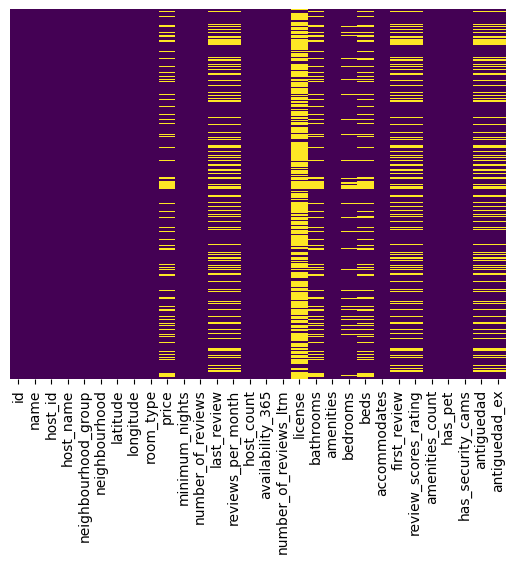

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### `Price`

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45570 entries, 0 to 45569
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45570 non-null  int64         
 1   name                   45569 non-null  object        
 2   host_id                45570 non-null  int64         
 3   host_name              45568 non-null  object        
 4   neighbourhood_group    45570 non-null  object        
 5   neighbourhood          45570 non-null  object        
 6   latitude               45570 non-null  float64       
 7   longitude              45570 non-null  float64       
 8   room_type              45570 non-null  object        
 9   price                  37312 non-null  float64       
 10  minimum_nights         45570 non-null  int64         
 11  number_of_reviews      45570 non-null  int64         
 12  last_review            32959 non-null  datetime64[ns]
 13  r

In [18]:
df["price"].describe()

count    37312.000000
mean       301.985688
std       1098.958186
min          5.000000
25%         99.000000
50%        156.000000
75%        268.000000
max      99999.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

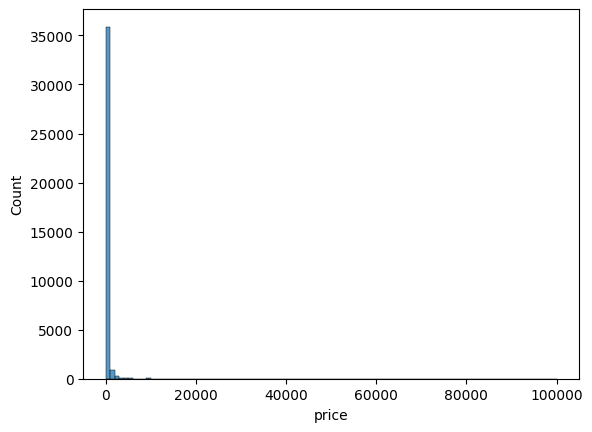

In [19]:
sns.histplot(data=df['price'], bins=100)

In [20]:
price_under_1000 = df[df['price'] <= 1000]

In [21]:
price_under_1000["price"].describe()

count    35881.000000
mean       204.366099
std        170.036183
min          5.000000
25%         98.000000
50%        150.000000
75%        250.000000
max       1000.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

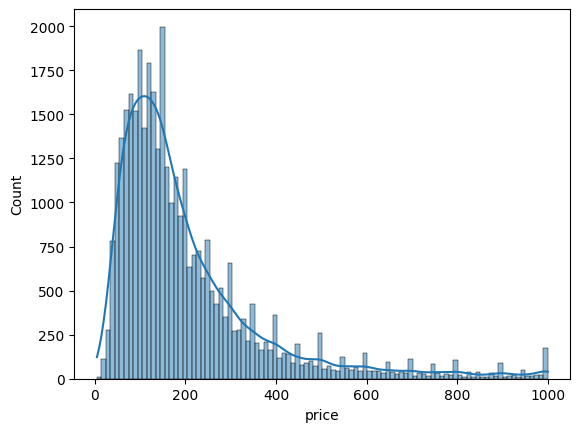

In [22]:
sns.histplot(data = price_under_1000["price"], bins=100, kde=True)

#### KNN con encoder manual y k=215

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45570 entries, 0 to 45569
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45570 non-null  int64         
 1   name                   45569 non-null  object        
 2   host_id                45570 non-null  int64         
 3   host_name              45568 non-null  object        
 4   neighbourhood_group    45570 non-null  object        
 5   neighbourhood          45570 non-null  object        
 6   latitude               45570 non-null  float64       
 7   longitude              45570 non-null  float64       
 8   room_type              45570 non-null  object        
 9   price                  37312 non-null  float64       
 10  minimum_nights         45570 non-null  int64         
 11  number_of_reviews      45570 non-null  int64         
 12  last_review            32959 non-null  datetime64[ns]
 13  r

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Creamos copia para la variables escaladas
df_scaled = df.copy()

# Estas son las columnas que se van a usar como predictores de Price
columnas=['neighbourhood_group', 'room_type', "accommodates", 
        "amenities_count", "has_pet", "latitude", "longitude"]
df_scaled = df_scaled[columnas + ['price']]

"""
Significado variables:
neighbourhood_group: región del condado de california (encodear a mano)
room_type: tipo de habitación (encodear a mano)
latitud 
longitud
accomodates: inquilinos máximos
amenities_count: cantidad de servicios adicionales
has_pet: si acepta mascotas (si uno de los servicios adicionales es "pet")
"""

# Encodeamos las variables categóricas
room_type_dict = {'Entire home/apt':0, 'Private room':1, 'Shared room':2, 'Hotel room':3}
df_scaled['room_type'] = df_scaled['room_type'].map(room_type_dict)
# Criterio: de más privacidad a menos privacidad

neighbourhood_group_dict ={'City of Los Angeles':0, 'Other Cities':1, 'Unincorporated Areas':2}
df_scaled['neighbourhood_group'] = df_scaled['neighbourhood_group'].map(neighbourhood_group_dict)
# Criterio: de las zonas más urbanas a la más rurales

# Vamos a normalizar todas las variables que vamos a usar como predictores de Price
scaler = StandardScaler()
df_scaled[columnas] = scaler.fit_transform(df_scaled[columnas]) # Fit transform SOBRE EL ENTRENAMIENTO

# Creamos dos dataframes basados en la presencia o ausencia de Price
df_with_price = df_scaled.dropna(subset=['price'])
df_without_price = df_scaled[df_scaled['price'].isna()].drop(columns='price')

# Usamor la raiz de N como valor de K
modelo = KNeighborsRegressor(n_neighbors=215) 

# Entrenamos el modelo
modelo.fit(df_with_price.drop(['price'], axis=1), df_with_price['price'])

# Predecimos los valores de Price
predictions = modelo.predict(df_without_price)

# Imputamos los valores predichos de price en el dataframe df_price_knn
df_price_knn = df_scaled.copy()
df_price_knn.loc[df_price_knn['price'].isna(), 'price'] = predictions

In [25]:
df_scaled[269:279]

neighbourhood_group  room_type  accommodates  amenities_count   has_pet  \
269             0.614569   1.446810     -0.357168        -1.507929 -0.720311   
270             0.614569  -0.563224     -0.357168        -1.297237  1.388289   
271             2.142276  -0.563224      0.689754         1.652452  1.388289   
272            -0.913137  -0.563224     -0.008194        -0.770507 -0.720311   
273            -0.913137  -0.563224     -0.008194        -1.139218 -0.720311   
274             0.614569   1.446810     -0.706142        -1.507929 -0.720311   
275             0.614569  -0.563224     -0.706142        -1.297237  1.388289   
276             0.614569  -0.563224     -0.008194         0.651665 -0.720311   
277            -0.913137  -0.563224     -0.008194        -0.928526 -0.720311   
278            -0.913137  -0.563224     -0.706142        -1.139218 -0.720311   

     latitude  longitude  price  
269  0.719665  -0.132075    NaN  
270  0.026890  -0.414980  170.0  
271  0.264732  -1.634125    NaN  
272 -0.075991   0.305305    NaN  
273 -0.435779  -0.844268  239.0  
274 -0.302325   0.506102   89.0  
275  0.025029  -0.413470  150.0  
276  0.899187  -0.148506  134.0  
277 -0.415451  -0.947684  180.0  
278  0.973893  -1.621115    NaN

In [26]:
df_price_knn[269:279]

neighbourhood_group  room_type  accommodates  amenities_count   has_pet  \
269             0.614569   1.446810     -0.357168        -1.507929 -0.720311   
270             0.614569  -0.563224     -0.357168        -1.297237  1.388289   
271             2.142276  -0.563224      0.689754         1.652452  1.388289   
272            -0.913137  -0.563224     -0.008194        -0.770507 -0.720311   
273            -0.913137  -0.563224     -0.008194        -1.139218 -0.720311   
274             0.614569   1.446810     -0.706142        -1.507929 -0.720311   
275             0.614569  -0.563224     -0.706142        -1.297237  1.388289   
276             0.614569  -0.563224     -0.008194         0.651665 -0.720311   
277            -0.913137  -0.563224     -0.008194        -0.928526 -0.720311   
278            -0.913137  -0.563224     -0.706142        -1.139218 -0.720311   

     latitude  longitude       price  
269  0.719665  -0.132075  611.195349  
270  0.026890  -0.414980  170.000000  
271  0.264732  -1.634125  444.283721  
272 -0.075991   0.305305  184.613953  
273 -0.435779  -0.844268  239.000000  
274 -0.302325   0.506102   89.000000  
275  0.025029  -0.413470  150.000000  
276  0.899187  -0.148506  134.000000  
277 -0.415451  -0.947684  180.000000  
278  0.973893  -1.621115  155.800000

In [27]:
df["price"] = df_price_knn["price"]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45570 entries, 0 to 45569
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45570 non-null  int64         
 1   name                   45569 non-null  object        
 2   host_id                45570 non-null  int64         
 3   host_name              45568 non-null  object        
 4   neighbourhood_group    45570 non-null  object        
 5   neighbourhood          45570 non-null  object        
 6   latitude               45570 non-null  float64       
 7   longitude              45570 non-null  float64       
 8   room_type              45570 non-null  object        
 9   price                  45570 non-null  float64       
 10  minimum_nights         45570 non-null  int64         
 11  number_of_reviews      45570 non-null  int64         
 12  last_review            32959 non-null  datetime64[ns]
 13  r

In [29]:
df["price"].describe()

count    45570.000000
mean       288.728948
std       1000.331356
min          5.000000
25%        100.000000
50%        156.000000
75%        260.000000
max      99999.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

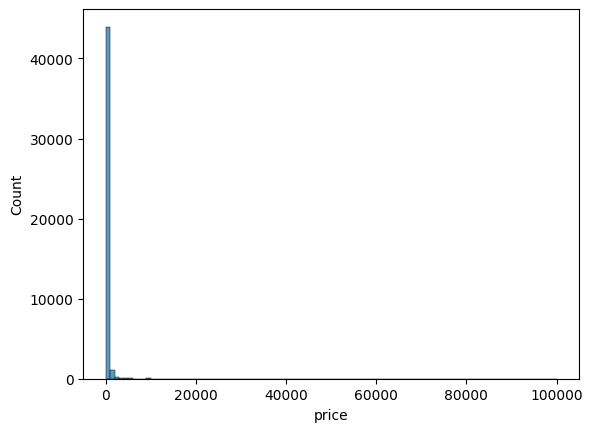

In [30]:
sns.histplot(data=df['price'], bins=100)

In [31]:
price_under_1000_KNN = df[df['price'] <= 1000]

In [32]:
price_under_1000_KNN["price"].describe()

count    43961.000000
mean       203.896637
std        167.804169
min          5.000000
25%         99.000000
50%        151.000000
75%        246.000000
max       1000.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

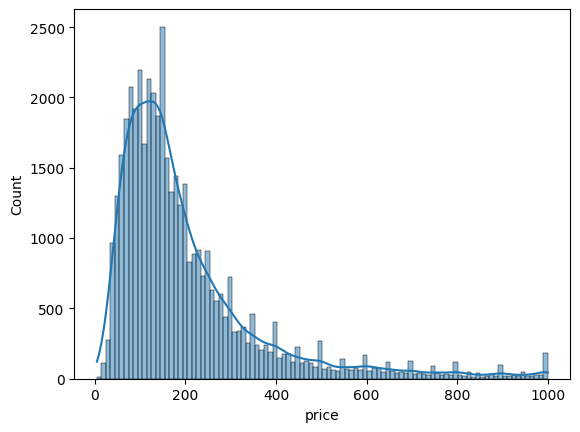

In [33]:
sns.histplot(data = price_under_1000_KNN["price"], bins=100, kde=True)

### Dropeo de `Name` y `Host Name`

In [34]:
df.dropna(subset=['name', 'host_name'], inplace=True) # quitamos los 3 nulos

### Ajustes en `Bathrooms`, `Bedrooms` y `Beds`

In [35]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'host_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'bathrooms', 'amenities',
       'bedrooms', 'beds', 'accommodates', 'first_review',
       'review_scores_rating', 'amenities_count', 'has_pet',
       'has_security_cams', 'antiguedad', 'antiguedad_ex'],
      dtype='object')

#### Bathrooms

In [36]:
df['bathrooms'] = np.ceil(df['bathrooms'])

In [37]:
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms"].mode().values[0])

<Axes: xlabel='bathrooms', ylabel='Count'>

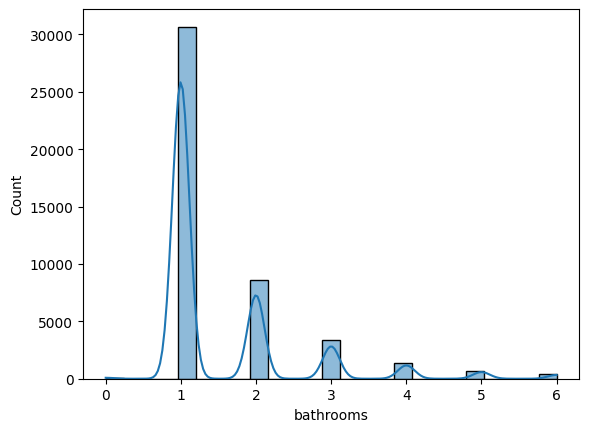

In [38]:
baños = df[df["bathrooms"]<=6]
sns.histplot(data=baños["bathrooms"], bins=25,kde=True)

#### Bedrooms

<Axes: xlabel='bedrooms', ylabel='Count'>

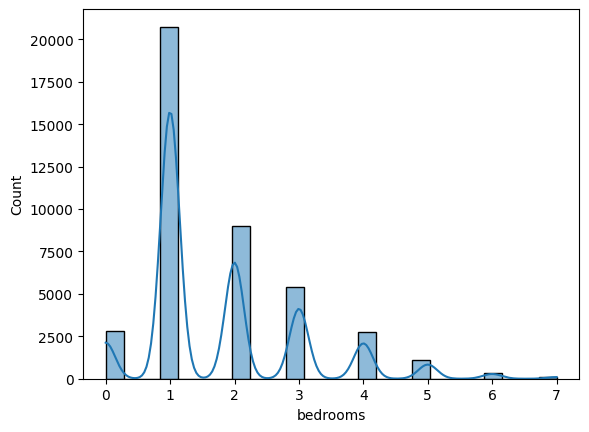

In [39]:
cuartos = df[df["bedrooms"]<=7]
sns.histplot(data=cuartos, x="bedrooms", bins=25,kde=True)

In [40]:
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].mode().values[0])

<Axes: xlabel='bedrooms', ylabel='Count'>

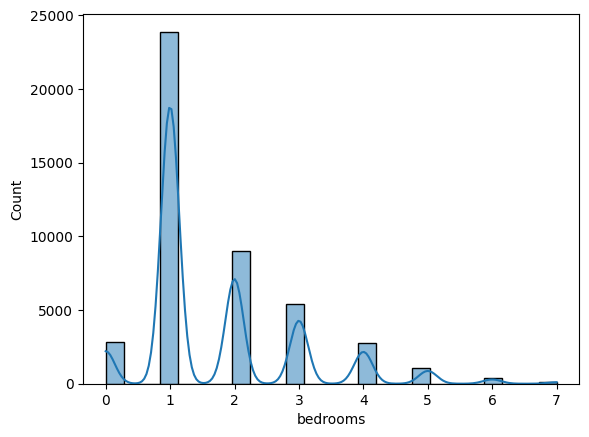

In [41]:
cuartos = df[df["bedrooms"]<=7]
sns.histplot(data=cuartos, x="bedrooms", bins=25,kde=True)

#### Beds

<Axes: xlabel='beds', ylabel='Count'>

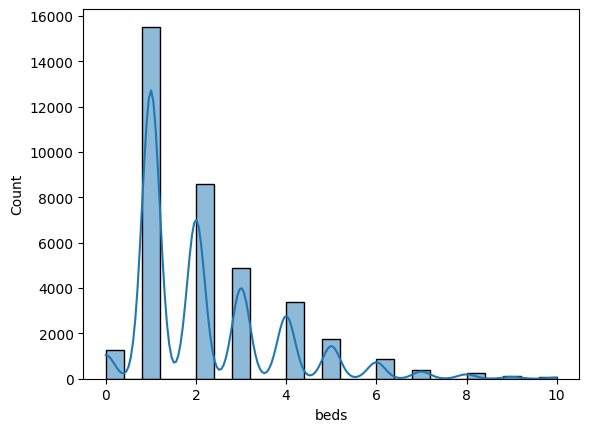

In [42]:
camas = df[df["beds"]<=10]
sns.histplot(data=camas["beds"], bins=25,kde=True)

In [43]:
df["beds"] = df["beds"].fillna(df["beds"].median())

<Axes: xlabel='beds', ylabel='Count'>

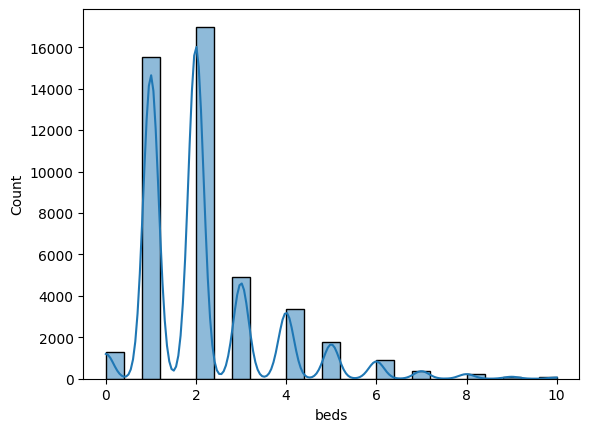

In [44]:
camas = df[df["beds"]<=10]
sns.histplot(data=camas["beds"], bins=25,kde=True)

### Licencia

In [45]:
df["license"].value_counts()

license
Exempt                                                                  1219
Exempt - This listing is a transient occupancy residential structure     850
Exempt - This listing is a hotel or motel                                748
Exempt - This listing is a bed and breakfast                             521
HSR19-004485                                                              26
                                                                        ... 
HSR24-000103                                                               1
HSR23-002513                                                               1
HSR23-003290                                                               1
HSR21-001463                                                               1
HSR19-004909                                                               1
Name: count, Length: 7449, dtype: int64

In [46]:
df["license"].fillna("Unlicensed", inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_128976\1723035800.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["license"].fillna("Unlicensed", inplace=True)


In [47]:
df["license"].value_counts()

license
Unlicensed                                                              32986
Exempt                                                                   1219
Exempt - This listing is a transient occupancy residential structure      850
Exempt - This listing is a hotel or motel                                 748
Exempt - This listing is a bed and breakfast                              521
                                                                        ...  
HSR24-000103                                                                1
HSR23-002513                                                                1
HSR23-003290                                                                1
HSR21-001463                                                                1
HSR19-004909                                                                1
Name: count, Length: 7450, dtype: int64

## Casas no disponibles

In [48]:
# Lista de valores de 'id' sin disponibilidad
ids_to_drop = [18598748, 39699546, 19552571, 31695262, 48406230, 16452452, 19769097,3283551, 28363598, 18920210]

df = df[~df['id'].isin(ids_to_drop)]

## Comparación final de Nulos

Algunas casas explicitan en su columna name que no están disponibles, así que vamos a eliminarlas también manualmente

<Axes: >

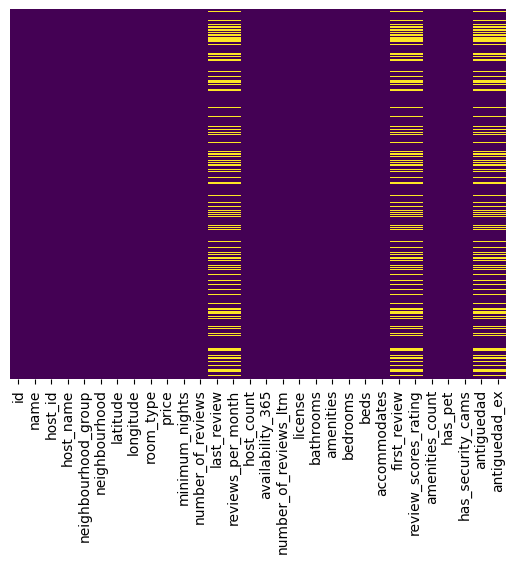

In [49]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [50]:
df.isnull().sum()/len(df)*100

id                        0.000000
name                      0.000000
host_id                   0.000000
host_name                 0.000000
neighbourhood_group       0.000000
neighbourhood             0.000000
latitude                  0.000000
longitude                 0.000000
room_type                 0.000000
price                     0.000000
minimum_nights            0.000000
number_of_reviews         0.000000
last_review              27.664245
reviews_per_month        27.664245
host_count                0.000000
availability_365          0.000000
number_of_reviews_ltm     0.000000
license                   0.000000
bathrooms                 0.000000
amenities                 0.000000
bedrooms                  0.000000
beds                      0.000000
accommodates              0.000000
first_review             27.664245
review_scores_rating     27.633514
amenities_count           0.000000
has_pet                   0.000000
has_security_cams         0.000000
antiguedad          

# Detección de valores atípicos

Columna 1: 'id'. Los valores entre el primer cuartil 31243810.0 y el tercer cuartil 9.037650144807547e+17 componen el rango intercuartílico, que es de tamaño 9.037650144495109e+17
Los valores extremadamente atípicos están por debajo de -2.711295043317289e+18 y por encima de 3.6150600578292874e+18, y en esta columna hay un total de 0 datos atípicos.



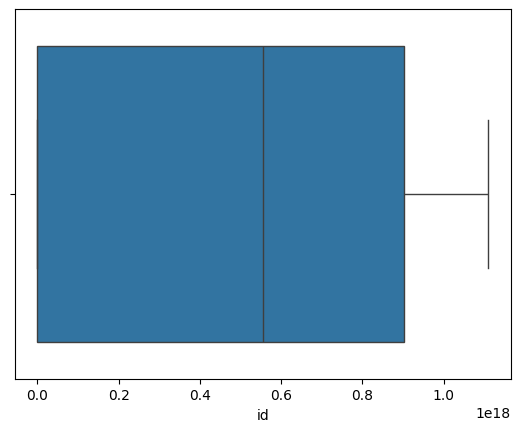

Columna 2: 'host_id'. Los valores entre el primer cuartil 26019462.0 y el tercer cuartil 349564712.0 componen el rango intercuartílico, que es de tamaño 323545250.0
Los valores extremadamente atípicos están por debajo de -944616288.0 y por encima de 1320200462.0, y en esta columna hay un total de 0 datos atípicos.



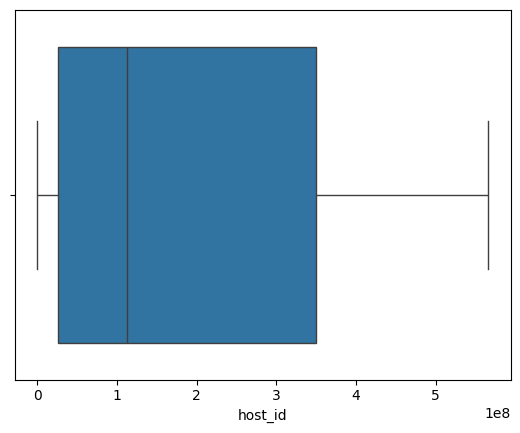

Columna 3: 'latitude'. Los valores entre el primer cuartil 33.99856 y el tercer cuartil 34.10789 componen el rango intercuartílico, que es de tamaño 0.1
Los valores extremadamente atípicos están por debajo de 33.7 y por encima de 34.4, y en esta columna hay un total de 1111 datos atípicos.



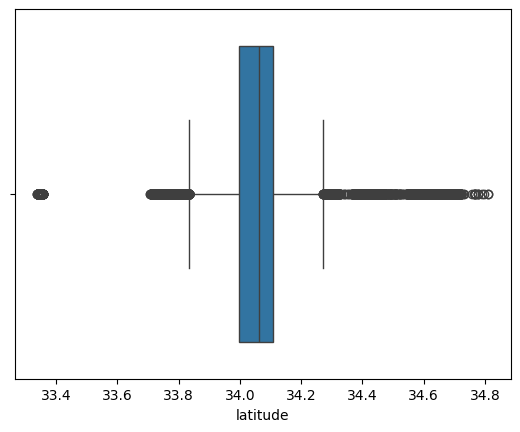

Columna 4: 'longitude'. Los valores entre el primer cuartil -118.41452524135582 y el tercer cuartil -118.23671 componen el rango intercuartílico, que es de tamaño 0.2
Los valores extremadamente atípicos están por debajo de -118.9 y por encima de -117.7, y en esta columna hay un total de 12 datos atípicos.



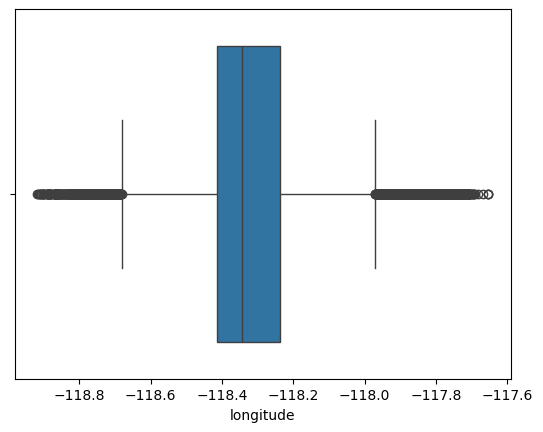

Columna 5: 'price'. Los valores entre el primer cuartil 100.0 y el tercer cuartil 260.0 componen el rango intercuartílico, que es de tamaño 160.0
Los valores extremadamente atípicos están por debajo de -380.0 y por encima de 740.0, y en esta columna hay un total de 2680 datos atípicos.



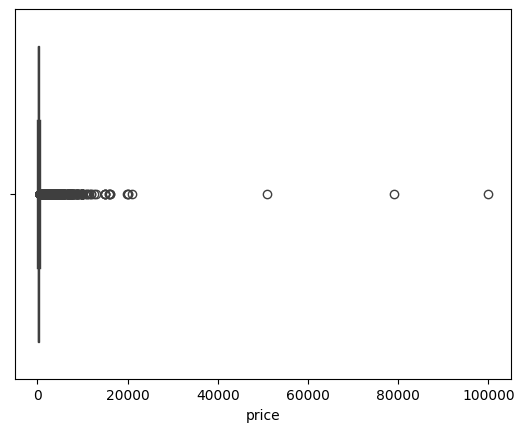

Columna 6: 'minimum_nights'. Los valores entre el primer cuartil 2.0 y el tercer cuartil 30.0 componen el rango intercuartílico, que es de tamaño 28.0
Los valores extremadamente atípicos están por debajo de -82.0 y por encima de 114.0, y en esta columna hay un total de 242 datos atípicos.



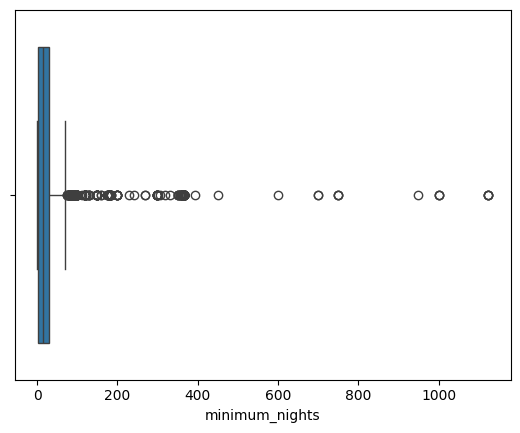

Columna 7: 'number_of_reviews'. Los valores entre el primer cuartil 0.0 y el tercer cuartil 32.0 componen el rango intercuartílico, que es de tamaño 32.0
Los valores extremadamente atípicos están por debajo de -96.0 y por encima de 128.0, y en esta columna hay un total de 3473 datos atípicos.



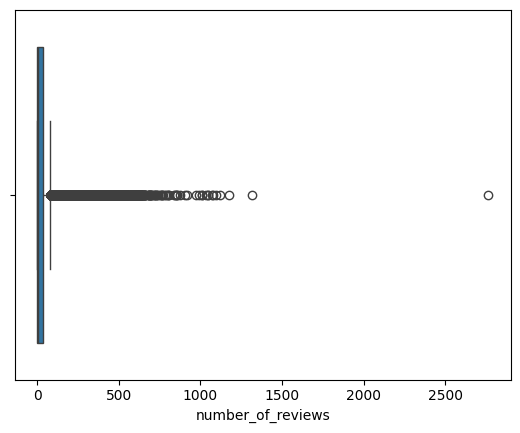

Columna 8: 'reviews_per_month'. Los valores entre el primer cuartil 0.21 y el tercer cuartil 2.1 componen el rango intercuartílico, que es de tamaño 1.9
Los valores extremadamente atípicos están por debajo de -5.5 y por encima de 7.8, y en esta columna hay un total de 219 datos atípicos.



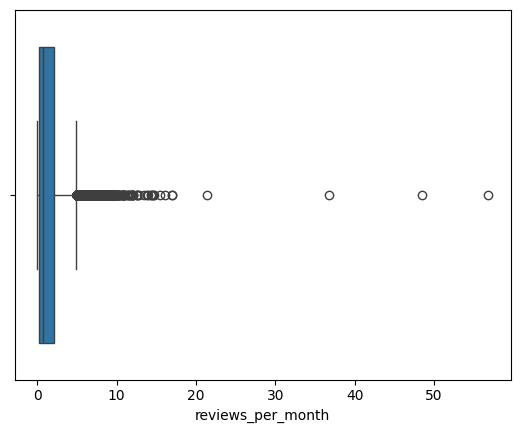

Columna 9: 'host_count'. Los valores entre el primer cuartil 1.0 y el tercer cuartil 10.0 componen el rango intercuartílico, que es de tamaño 9.0
Los valores extremadamente atípicos están por debajo de -26.0 y por encima de 37.0, y en esta columna hay un total de 5301 datos atípicos.



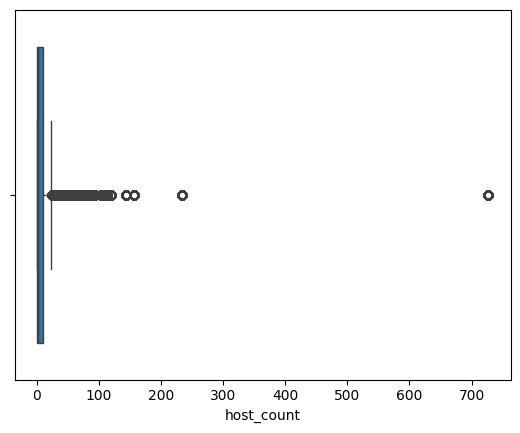

Columna 10: 'availability_365'. Los valores entre el primer cuartil 29.0 y el tercer cuartil 319.0 componen el rango intercuartílico, que es de tamaño 290.0
Los valores extremadamente atípicos están por debajo de -841.0 y por encima de 1189.0, y en esta columna hay un total de 0 datos atípicos.



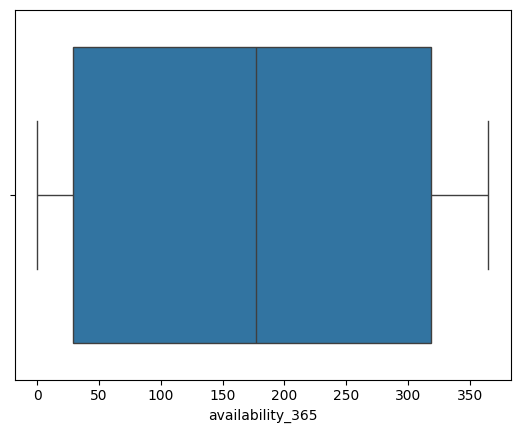

Columna 11: 'number_of_reviews_ltm'. Los valores entre el primer cuartil 0.0 y el tercer cuartil 8.0 componen el rango intercuartílico, que es de tamaño 8.0
Los valores extremadamente atípicos están por debajo de -24.0 y por encima de 32.0, y en esta columna hay un total de 4043 datos atípicos.



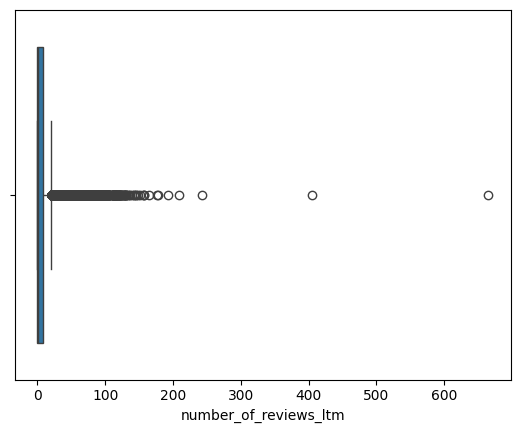

Columna 12: 'bathrooms'. Los valores entre el primer cuartil 1.0 y el tercer cuartil 2.0 componen el rango intercuartílico, que es de tamaño 1.0
Los valores extremadamente atípicos están por debajo de -2.0 y por encima de 5.0, y en esta columna hay un total de 752 datos atípicos.



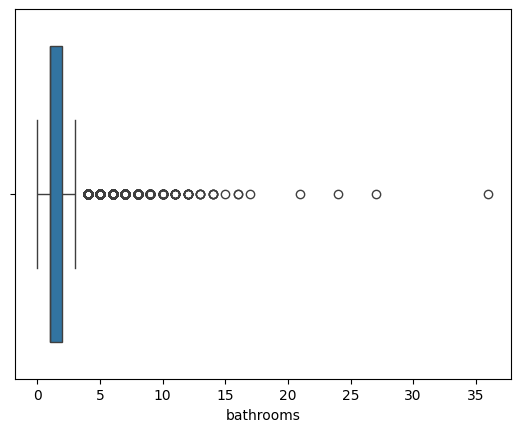

Columna 13: 'bedrooms'. Los valores entre el primer cuartil 1.0 y el tercer cuartil 2.0 componen el rango intercuartílico, que es de tamaño 1.0
Los valores extremadamente atípicos están por debajo de -2.0 y por encima de 5.0, y en esta columna hay un total de 612 datos atípicos.



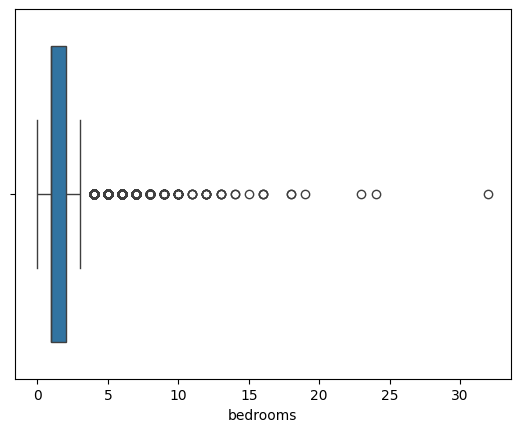

Columna 14: 'beds'. Los valores entre el primer cuartil 1.0 y el tercer cuartil 3.0 componen el rango intercuartílico, que es de tamaño 2.0
Los valores extremadamente atípicos están por debajo de -5.0 y por encima de 9.0, y en esta columna hay un total de 176 datos atípicos.



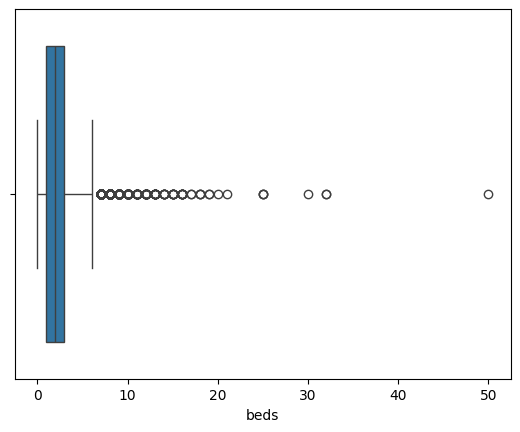

Columna 15: 'accommodates'. Los valores entre el primer cuartil 2.0 y el tercer cuartil 6.0 componen el rango intercuartílico, que es de tamaño 4.0
Los valores extremadamente atípicos están por debajo de -10.0 y por encima de 18.0, y en esta columna hay un total de 0 datos atípicos.



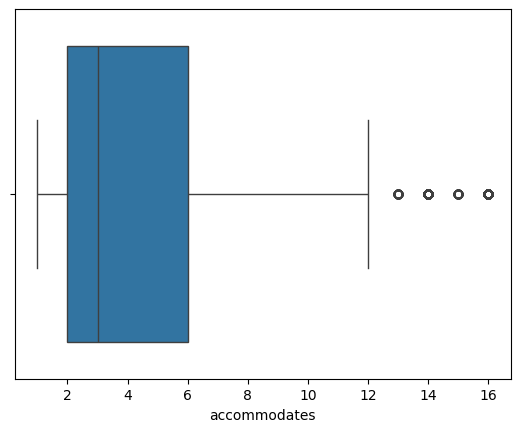

Columna 16: 'review_scores_rating'. Los valores entre el primer cuartil 4.72 y el tercer cuartil 5.0 componen el rango intercuartílico, que es de tamaño 0.3
Los valores extremadamente atípicos están por debajo de 3.9 y por encima de 5.8, y en esta columna hay un total de 1066 datos atípicos.



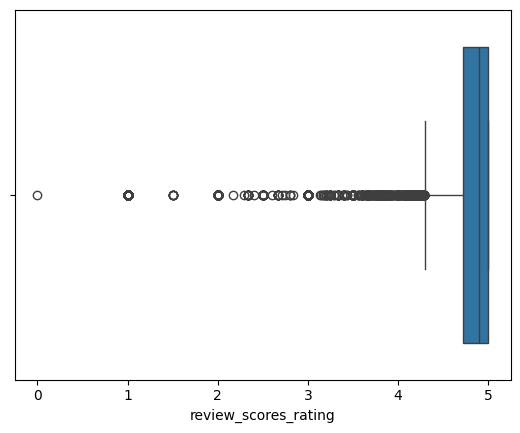

Columna 17: 'amenities_count'. Los valores entre el primer cuartil 21.0 y el tercer cuartil 50.0 componen el rango intercuartílico, que es de tamaño 29.0
Los valores extremadamente atípicos están por debajo de -66.0 y por encima de 137.0, y en esta columna hay un total de 0 datos atípicos.



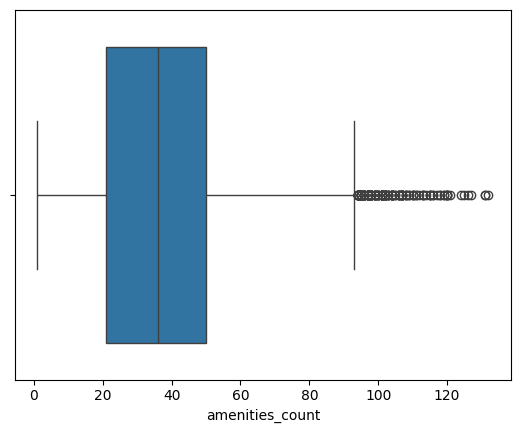

Columna 18: 'antiguedad'. Los valores entre el primer cuartil 1.1 y el tercer cuartil 5.7 componen el rango intercuartílico, que es de tamaño 4.6
Los valores extremadamente atípicos están por debajo de -12.7 y por encima de 19.5, y en esta columna hay un total de 0 datos atípicos.



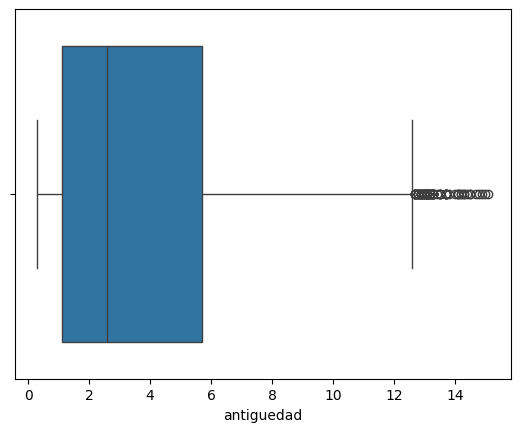

Columna 19: 'antiguedad_ex'. Los valores entre el primer cuartil 1.0 y el tercer cuartil 5.0 componen el rango intercuartílico, que es de tamaño 4.0
Los valores extremadamente atípicos están por debajo de -11.0 y por encima de 17.0, y en esta columna hay un total de 0 datos atípicos.



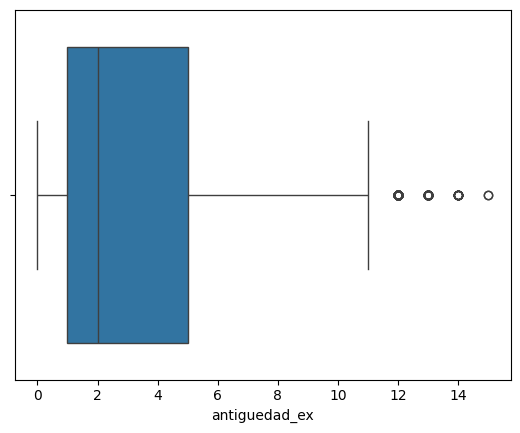

In [51]:
# Extraemos información sobre los cuartiles y los valores atípicos del dataframe
i = 0
for columna in df.columns:
    try:
        if df[columna].dtype == "int64" or df[columna].dtype == "float64": # Prestar atención al tipo de dato
            Q1 = df[columna].quantile(0.25)
            Q3 = df[columna].quantile(0.75)
            IQR = Q3 - Q1
            Inf = Q1 - 3*IQR
            Sup = Q3 + 3*IQR
            # Usamos 3*IQR para detectar valores extremadamente atípicos

            outliers = df[(df[columna] < Inf) | (df[columna] > Sup)]
            i += 1
            print(f"Columna {i}: '{columna}'. Los valores entre el primer cuartil {Q1} y el tercer cuartil {Q3} componen el rango intercuartílico, que es de tamaño {round(IQR,1)}\nLos valores extremadamente atípicos están por debajo de {round(Inf,1)} y por encima de {round(Sup,1)}, y en esta columna hay un total de {str(len(outliers))} datos atípicos.\n")
            sns.boxplot(data=df, x=columna, orient="h")
            plt.show()
        else:
            pass
    except:
        pass

### Corrección de precios

Una vez identificados los outliers de los datos, podemos crear subdataframes según nos interese

Podemos dividir la muestra de precios en 2: una para los precios superiores a 740 dólares USD y otra para los inferiores a 740 dólares USD

In [52]:
df_precios_comunes = df[df["price"]<=740]
df_precios_comunes

id                                               name  \
0       969148637126091185                                     Rancho Aguirre   
1      1084360946145463169                      Huge guest house private room   
3       986988052370510312                            private home in pacoima   
5       751734916792215090                LiLBetty’s Casita. No cleaning fees   
7       694137901600182126                 Topanga Oasis - Guesthouse Retreat   
...                    ...                                                ...   
45564             18413105              Cozy Studio Apartment In Santa Monica   
45565             20622647          2br Charming Craftsman Bungalow on a Hill   
45566   934039436998223788  Art District Getaway in Lil Tokyo | Walk to Metro   
45567             19311232  Renovated Silver Lake House with Private Backyard   
45568             19621931    Silver Lake Mid-century Nestled in the Treetops   

         host_id host_name   neighbourhood_group     neighbourhood   latitude  \
0      534598147     Ferdy  Unincorporated Areas  Lake Los Angeles  34.628008   
1       82025876      Shou          Other Cities          Torrance  33.816549   
3       23634612     Mario   City of Los Angeles           Pacoima  34.256305   
5       10348060   Michael          Other Cities          Torrance  33.826481   
7       22288758   Breanna  Unincorporated Areas           Topanga  34.101880   
...          ...       ...                   ...               ...        ...   
45564  127587231   Claudia          Other Cities      Santa Monica  34.023080   
45565   20666178    Dustin   City of Los Angeles     Glassell Park  34.111790   
45566   35786994     Kevin          Other Cities            Vernon  34.013550   
45567  135244376     Scott   City of Los Angeles       Silver Lake  34.090560   
45568     984198   Heather   City of Los Angeles       Silver Lake  34.104019   

        longitude        room_type  price  ...  bedrooms  beds accommodates  \
0     -117.846299     Private room  160.0  ...       1.0   1.0            2   
1     -118.315387     Private room   75.0  ...       1.0   2.0            3   
3     -118.430663  Entire home/apt  124.0  ...       1.0   1.0            3   
5     -118.313265  Entire home/apt  103.0  ...       1.0   1.0            2   
7     -118.589380  Entire home/apt  209.0  ...       1.0   2.0            2   
...           ...              ...    ...  ...       ...   ...          ...   
45564 -118.483490  Entire home/apt  126.0  ...       0.0   1.0            2   
45565 -118.234240  Entire home/apt  215.0  ...       2.0   4.0            4   
45566 -118.238380  Entire home/apt  180.0  ...       1.0   1.0            4   
45567 -118.283390  Entire home/apt  231.0  ...       2.0   2.0            4   
45568 -118.259705  Entire home/apt  380.0  ...       2.0   5.0            6   

       first_review  review_scores_rating  amenities_count  has_pet  \
0               NaT                   NaN                7    False   
1               NaT                   NaN               11     True   
3               NaT                   NaN                8    False   
5        2023-04-02                  4.83               33     True   
7        2022-10-21                  4.96               58    False   
...             ...                   ...              ...      ...   
45564    2017-05-29                  4.82               23    False   
45565    2017-08-27                  4.77               68     True   
45566    2023-07-21                  5.00               81     True   
45567    2017-06-20                  4.95               40    False   
45568    2017-11-02                  4.85               78     True   

      has_security_cams  antiguedad antiguedad_ex  
0                 False         NaN           NaN  
1                 False         NaN           NaN  
3                 False         NaN           NaN  
5                  True         1.2           1.0  
7               

In [53]:
df_precios_nubes = df[df["price"]>740]
df_precios_nubes

id                                              name  \
2       596292401172099914                                    The Big Kahuna   
4       750761099803796354  Luxe Beachfront Living | Hot Tub | Stunning View   
6                 16273491                             Beautiful Family Home   
47     1034202977807477729                     Cottage Style Home City Views   
66     1066555368123471864  Entertainer's Paradise | Pool, Basketball & Yard   
...                    ...                                               ...   
45392   563774013818510686                 Malibu Cove by Stay Awhile Villas   
45418             53185691  Luxurious 3BR Oceanfront | Deck | Garage Parking   
45440             48663398     Beverly Hills Oasis | Parking | Modern Luxury   
45534   753522870508456149                     Casa Bonita resort experience   
45569   897196294114748850                  Stunning 4bd/4bth Close to Beach   

         host_id          host_name  neighbourhood_group   neighbourhood  \
2        7858796             Pamela         Other Cities          Malibu   
4       41223310          Luxe Home         Other Cities          Malibu   
6        3628423             Martha         Other Cities        Pasadena   
47      24418474              Armen         Other Cities        Glendale   
66      72933825   The Maimon Group  City of Los Angeles  Woodland Hills   
...          ...                ...                  ...             ...   
45392   24303784        Stay Awhile         Other Cities          Malibu   
45418  429429981  Vacasa California         Other Cities          Malibu   
45440   33694089           Mercedes  City of Los Angeles   Beverly Crest   
45534  393295246               Aviv  City of Los Angeles    Mid-Wilshire   
45569   81517697              Kemel         Other Cities    Santa Monica   

        latitude   longitude        room_type   price  ...  bedrooms  beds  \
2      34.045480 -118.622410  Entire home/apt  2000.0  ...       3.0   4.0   
4      34.037971 -118.650749  Entire home/apt  4200.0  ...       4.0   6.0   
6      34.161870 -118.143100  Entire home/apt   924.0  ...       4.0   5.0   
47     34.169179 -118.242302  Entire home/apt  1000.0  ...       4.0   4.0   
66     34.183773 -118.620236  Entire home/apt  1272.0  ...       5.0   5.0   
...          ...         ...              ...     ...  ...       ...   ...   
45392  34.025745 -118.762230  Entire home/apt  1781.0  ...       5.0   5.0   
45418  34.040290 -118.589540  Entire home/apt   925.0  ...       3.0   5.0   
45440  34.111660 -118.402550  Entire home/apt   840.0  ...       4.0   6.0   
45534  34.059480 -118.355930  Entire home/apt   962.0  ...       5.0   7.0   
45569  34.001512 -118.473851  Entire home/apt  1099.0  ...       4.0   4.0   

      accommodates  first_review  review_scores_rating  amenities_count  \
2                6           NaT                   NaN               16   
4               10    2022-12-19                  5.00               57   
6                8    2023-01-03                  5.00               69   
47               8           NaT                   NaN               17   
66              10           NaT                   NaN               68   
...            ...           ...                   ...              ...   
45392            8    2022-08-03                  5.00               43   
45418            6    2022-01-02                  4.67               33   
45440           10    2021-06-08                  4.79               77   
45534           12    2022-11-13                  4.98               94   
45569           10    2023-05-30                  5.00               68   

       has_pet has_security_cams  antiguedad antiguedad_ex  
2        False             False         NaN           NaN  
4        False              True         1.5           1.0  
6         True              True         1.5           1.0  
47        True              True         NaN           NaN  
66     

<Axes: xlabel='price', ylabel='Count'>

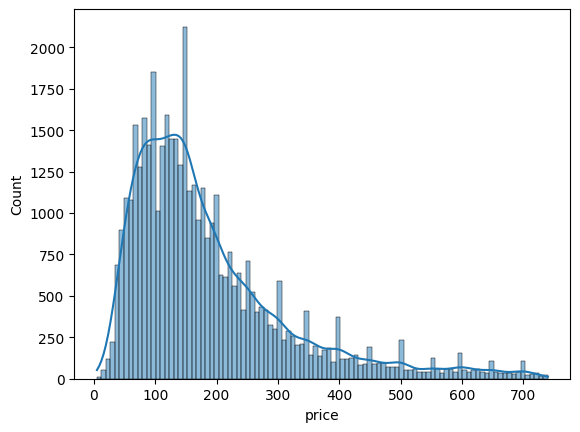

In [54]:
sns.histplot(data=df_precios_comunes["price"], bins=100, kde=True)

<Axes: xlabel='price', ylabel='Count'>

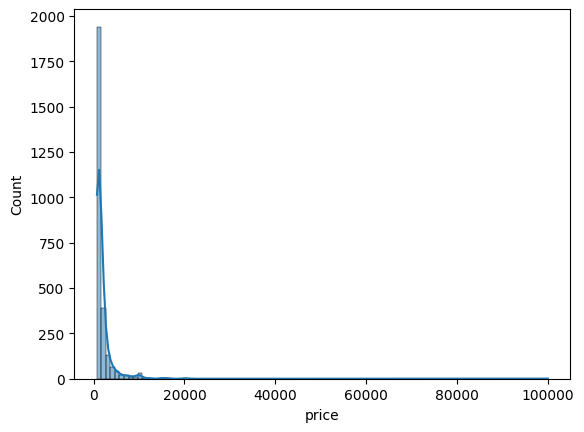

In [55]:
sns.histplot(data=df_precios_nubes["price"], bins=100, kde=True)

<Axes: xlabel='price'>

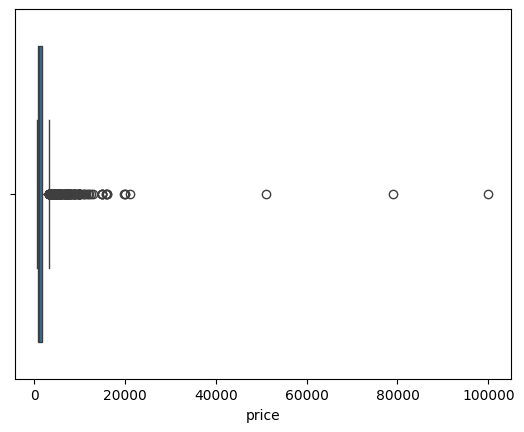

In [56]:
sns.boxplot(data=df_precios_nubes, x="price", orient="h")

Incluso dentro de los datos atípicos de price hay tanta diferencia entre los precios que hasta los valores extremadamente atípicos tienen valores extremadamente atípicos, por lo que vamos a repetir el proceso de obtención de outliers para ver a partir de qué valor de precios_nubes tenemos valores extr.atípicos y crear un subset de extremadamente extremadamente atípicos

In [57]:
Q1 = df_precios_nubes["price"].quantile(0.25)
Q3 = df_precios_nubes["price"].quantile(0.75)
IQR = Q3 - Q1
Inf = Q1 - 3*IQR
Sup = Q3 + 3*IQR

In [58]:
outliers = df_precios_nubes[(df_precios_nubes["price"] < Inf) | (df_precios_nubes["price"] > Sup)]
print(f"Columna Price Atípicos: Los valores entre el primer cuartil {Q1} y el tercer cuartil {Q3} componen el rango intercuartílico, que es de tamaño {round(IQR,1)}\nLos valores extremadamente atípicos están por debajo de {round(Inf,1)} y por encima de {round(Sup,1)}, y en esta columna hay un total de {str(len(outliers))} datos extremadamente atípicos.\n")

Columna Price Atípicos: Los valores entre el primer cuartil 900.0 y el tercer cuartil 1850.0 componen el rango intercuartílico, que es de tamaño 950.0
Los valores extremadamente atípicos están por debajo de -1950.0 y por encima de 4700.0, y en esta columna hay un total de 152 datos extremadamente atípicos.



Definiendo los valores intermedios a partir de los precios nubes con un límite superior en 4700...

In [59]:
df_precios_intermedios = df_precios_nubes[df_precios_nubes["price"] <= 4700]

y definiendo los valores gigantes a partir de ese límite de 4700...

In [60]:
df_precios_GIGANTES = df_precios_nubes[df_precios_nubes["price"]>4700]

<Axes: xlabel='price', ylabel='Count'>

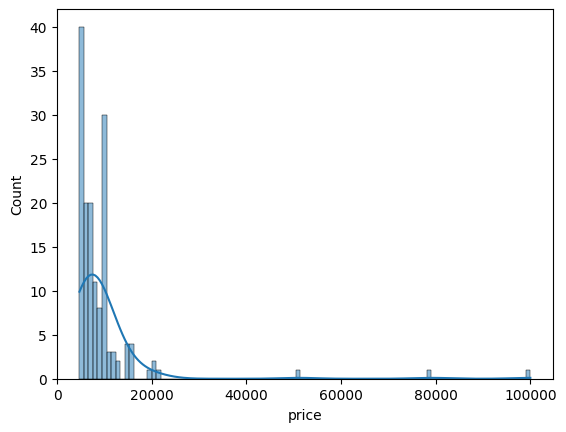

In [61]:
sns.histplot(data=df_precios_GIGANTES["price"], bins=100, kde=True)

... hemos creado 3 categorías de precios según su magnitud:

precios comunes: 0$ a 740$ incluido (Lo usual, con 42.886 obs) `common_prices` 

precios nubes (tiene atípicos) -> precios intermedios: 740$ a 4700$ incluido (Nivel elevado, con 2528 obs) `high_prices`

precios gigantes: 4700$ a 100k$ (Alto nivel, con 153 obs) `luxury_prices`

In [62]:
df_precios_comunes["price"].describe() 

count    42877.000000
mean       187.138926
std        130.929570
min          5.000000
25%         97.302326
50%        150.000000
75%        235.000000
max        740.000000
Name: price, dtype: float64

In [63]:
df_precios_intermedios["price"].describe()

count    2528.000000
mean     1413.388884
std       756.858884
min       740.079070
25%       900.000000
50%      1140.737209
75%      1631.145349
max      4700.000000
Name: price, dtype: float64

In [64]:
df_precios_GIGANTES["price"].describe()

count      152.000000
mean      9596.677632
std      10505.478319
min       4713.000000
25%       5595.250000
50%       7500.000000
75%      10000.000000
max      99999.000000
Name: price, dtype: float64

Ahora crearemos una variable llamada `price_level` que indicará con un string la categoría en la que correspondería el alojamiento según el precio que ha costado

In [65]:
df["price_level"] = pd.cut(df["price"], bins=[0, 740, 4700, 100000], labels=["Common", "High", "Luxury"])

Esta variable puede ser útil para encasillar o categorizar los alojamientos, tanto a nivel gráfico como para tratar de visualizarlos en un mapa

## Ver datos únicos

In [66]:
for col in df.columns:  # Para cada columna del dataframe:
    print(f"Datos únicos de la columna {col} ({len(df[col].unique())} datos distintos):") # En la columna ___ ...
    print(df[col].unique()) # ...Imprimimos los valores/categorías únicas de cada columna...
    print("\n") # ...y un espacio de línea

Datos únicos de la columna id (45557 datos distintos):
[ 969148637126091185 1084360946145463169  596292401172099914 ...
            19311232            19621931  897196294114748850]


Datos únicos de la columna name (43484 datos distintos):
['Rancho Aguirre' 'Huge guest house private room' 'The Big Kahuna' ...
 'Renovated Silver Lake House with Private Backyard'
 'Silver Lake Mid-century Nestled in the Treetops'
 'Stunning 4bd/4bth Close to Beach']


Datos únicos de la columna host_id (23016 datos distintos):
[534598147  82025876   7858796 ... 127587231  20666178 135244376]


Datos únicos de la columna host_name (8468 datos distintos):
['Ferdy' 'Shou' 'Pamela' ... 'Searcy' 'Colin And Christie' 'Maddalena']


Datos únicos de la columna neighbourhood_group (3 datos distintos):
['Unincorporated Areas' 'Other Cities' 'City of Los Angeles']


Datos únicos de la columna neighbourhood (266 datos distintos):
['Lake Los Angeles' 'Torrance' 'Malibu' 'Pacoima' 'Pasadena' 'Topanga'
 'South San Gab

## Clasificación de variables

In [67]:
# Sacamos los nombres de las columnas numéricas y categóricas
def tipo_de_columnas_ordenadas (df2):
    string = []
    num_int = []
    num_float = []
    date = []
    category = []
    boolean = []

    for col in df2.columns:
        if(df2[col].dtype == "object"):
            string.append(col)
        elif(df2[col].dtype == "int64"):
            num_int.append(col)
        elif(df2[col].dtype == "datetime64[ns]"):
            date.append(col)
        elif(df2[col].dtype == "float64"):
            num_float.append(col)
        elif(df2[col].dtype == "bool"):
            boolean.append(col)
        else:
            category.append(col)

    return string , num_int, num_float, date, category, boolean

string , num_int, num_float, date, category, boolean = tipo_de_columnas_ordenadas(df)
print(f"Tenemos {len(string)} variables atributo o strings, que son: ", string)
print(f"Tenemos {len(num_int)} variables numéricas con números enteros, que son: ", num_int)
print(f"Tenemos {len(num_float)} variables numéricas con decimales, que son: ", num_float)
print(f"Tenemos {len(date)} variables en formato fecha, que son: ", date)
print(f"Tenemos {len(category)} variables categóricas, que son: ", category)
print(f"Tenemos {len(boolean)} variables booleanas, que son: ", boolean)

Tenemos 7 variables atributo o strings, que son:  ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'license', 'amenities']
Tenemos 9 variables numéricas con números enteros, que son:  ['id', 'host_id', 'minimum_nights', 'number_of_reviews', 'host_count', 'availability_365', 'number_of_reviews_ltm', 'accommodates', 'amenities_count']
Tenemos 10 variables numéricas con decimales, que son:  ['latitude', 'longitude', 'price', 'reviews_per_month', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'antiguedad', 'antiguedad_ex']
Tenemos 2 variables en formato fecha, que son:  ['last_review', 'first_review']
Tenemos 1 variables categóricas, que son:  ['price_level']
Tenemos 2 variables booleanas, que son:  ['has_pet', 'has_security_cams']


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45557 entries, 0 to 45569
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45557 non-null  int64         
 1   name                   45557 non-null  object        
 2   host_id                45557 non-null  int64         
 3   host_name              45557 non-null  object        
 4   neighbourhood_group    45557 non-null  object        
 5   neighbourhood          45557 non-null  object        
 6   latitude               45557 non-null  float64       
 7   longitude              45557 non-null  float64       
 8   room_type              45557 non-null  object        
 9   price                  45557 non-null  float64       
 10  minimum_nights         45557 non-null  int64         
 11  number_of_reviews      45557 non-null  int64         
 12  last_review            32954 non-null  datetime64[ns]
 13  review

# Outliers

In [69]:
# Creamos una función que elimine los valores atípicos de un dataframe
#                                          def corrector_outliers(df):
#     for columna in df.columns: 
#         if df[columna].dtype == "int64" or df[columna].dtype == "float64": # Para cada columna con valores numéricos, calcula una serie de datos
#             Q1 = df[columna].quantile(0.25)
#             Q3 = df[columna].quantile(0.75)
#             IQR = Q3 - Q1
#             Inf = Q1 - 1.5*IQR
#             Sup = Q3 + 1.5*IQR
#             df[columna] = np.where(df[columna] < Inf, Inf, df[columna]) # Y sustituye los valores atípicos inferiores y superiores por
#             df[columna] = np.where(df[columna] > Sup, Sup, df[columna]) # los valores de Q1 - 1.5*IQR y Q3 + 1.5*IQR, respectivamente
#     return df

# corrector_outliers(df)

# Variables

## Correlaciones

In [70]:
columnas=['minimum_nights', # 'neighbourhood_group','room_type', 
        "availability_365", "accommodates", "amenities_count", 
        "has_pet", "has_security_cams", "latitude", "longitude"]


In [71]:
df[columnas+["price"]].corr(method="pearson")

minimum_nights  availability_365  accommodates  \
minimum_nights           1.000000          0.037993     -0.076401   
availability_365         0.037993          1.000000      0.094145   
accommodates            -0.076401          0.094145      1.000000   
amenities_count         -0.121268          0.062228      0.296267   
has_pet                  0.007969          0.124464      0.197261   
has_security_cams       -0.096770          0.059241      0.139806   
latitude                 0.002427          0.012293      0.014501   
longitude               -0.114958         -0.052281     -0.064851   
price                   -0.002360          0.059876      0.292614   

                   amenities_count   has_pet  has_security_cams  latitude  \
minimum_nights           -0.121268  0.007969          -0.096770  0.002427   
availability_365          0.062228  0.124464           0.059241  0.012293   
accommodates              0.296267  0.197261           0.139806  0.014501   
amenities_count           1.000000  0.148618           0.299012 -0.008393   
has_pet                   0.148618  1.000000          -0.010684  0.048396   
has_security_cams         0.299012 -0.010684           1.000000  0.040664   
latitude                 -0.008393  0.048396           0.040664  1.000000   
longitude                -0.047561 -0.108924           0.105333 -0.069857   
price                     0.061486  0.055781           0.013200  0.008009   

                   longitude     price  
minimum_nights     -0.114958 -0.002360  
availability_365   -0.052281  0.059876  
accommodates       -0.064851  0.292614  
amenities_count    -0.047561  0.061486  
has_pet            -0.108924  0.055781  
has_security_cams   0.105333  0.013200  
latitude           -0.069857  0.008009  
longitude           1.000000 -0.114950  
price              -0.114950  1.000000

# quitar <|0.1|

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[columnas] = scaler.fit_transform(df_scaled[columnas]) # Fit transform SOBRE EL ENTRENAMIENTO


In [73]:
df_scaled[columnas+["price"]].corr(method="spearman").sort_values(by="price", ascending=False, axis=0).sort_values(by="price", ascending=False, axis=1)

price  accommodates  amenities_count   has_pet  \
price              1.000000      0.710356         0.244233  0.223304   
accommodates       0.710356      1.000000         0.312685  0.219618   
amenities_count    0.244233      0.312685         1.000000  0.139075   
has_pet            0.223304      0.219618         0.139075  1.000000   
availability_365   0.017277      0.080347         0.056570  0.124556   
latitude           0.010252      0.017331         0.005167  0.057061   
has_security_cams  0.003237      0.124261         0.304402 -0.010684   
minimum_nights    -0.068104     -0.093597        -0.096511  0.031450   
longitude         -0.290634     -0.066778        -0.019983 -0.104717   

                   availability_365  latitude  has_security_cams  \
price                      0.017277  0.010252           0.003237   
accommodates               0.080347  0.017331           0.124261   
amenities_count            0.056570  0.005167           0.304402   
has_pet                    0.124556  0.057061          -0.010684   
availability_365           1.000000  0.012034           0.059769   
latitude                   0.012034  1.000000           0.016940   
has_security_cams          0.059769  0.016940           1.000000   
minimum_nights             0.077982  0.009163          -0.138780   
longitude                 -0.051538 -0.056965           0.116162   

                   minimum_nights  longitude  
price                   -0.068104  -0.290634  
accommodates            -0.093597  -0.066778  
amenities_count         -0.096511  -0.019983  
has_pet                  0.031450  -0.104717  
availability_365         0.077982  -0.051538  
latitude                 0.009163  -0.056965  
has_security_cams       -0.138780   0.116162  
minimum_nights           1.000000  -0.203184  
longitude               -0.203184   1.000000

In [74]:
# Método de Spearman (Mide una dependencia no paramétrica y monotónica entre variables) 
correlacion_spearman = df.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_spearman, vmax=1, vmin=-1, annot=True, square=True, linewidths=0.5, cmap='coolwarm', linecolor='black')
plt.title('Mapa de Calor de la correlacion_spearman')
plt.show()

ValueError: could not convert string to float: 'Rancho Aguirre'

# Fin del documento

 ## Hipotesis

In [ ]:
h0 = 'El precio de las casas que admiten mascotas es igual al precio de las casas que no admiten mascotas.'
h1 = 'El precio de las casas que admiten mascotas es diferente al precio de las casas que no admiten mascotas.'

# Maping

In [ ]:
Long=-73.80
Lat=40.80
locations = list(zip(dataset.latitude, dataset.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

CRIME

In [100]:
crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
crime.head()

Date Rptd                DATE OCC  AREA  AREA NAME  \
0  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM     7   Wilshire   
1  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM     1    Central   
2  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM     3  Southwest   
3  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM     9   Van Nuys   
4  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM     6  Hollywood   

   Rpt Dist No  Part 1-2  Crm Cd                               Crm Cd Desc  \
0          784         1     510                          VEHICLE - STOLEN   
1          182         1     330                     BURGLARY FROM VEHICLE   
2          356         1     480                             BIKE - STOLEN   
3          964         1     343  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4          666         2     354                         THEFT OF IDENTITY   

               Mocodes Vict Descent  Premis Cd Status   Status Desc  Crm Cd 1  \
0                  NaN            O      101.0     AA  Adult Arrest     510.0   
1       1822 1402 0344            O      128.0     IC   Invest Cont     330.0   
2            0344 1251            X      502.0     IC   Invest Cont     480.0   
3            0325 1501            O      405.0     IC   Invest Cont     343.0   
4  1822 1501 0930 2004            H      102.0     IC   Invest Cont     354.0   

   Crm Cd 2  Crm Cd 3  Crm Cd 4                                  LOCATION  \
0     998.0       NaN       NaN   1900 S  LONGWOOD                     AV   
1     998.0       NaN       NaN   1000 S  FLOWER                       ST   
2       NaN       NaN       NaN   1400 W  37TH                         ST   
3       NaN       NaN       NaN  14000    RIVERSIDE                    DR   
4       NaN       NaN       NaN                         1900    TRANSIENT   

  Cross Street      LAT       LON  
0          NaN  34.0375 -118.3506  
1          NaN  34.0444 -118.2628  
2          NaN  34.0210 -118.3002  
3          NaN  34.1576 -118.4387  
4          NaN  34.0944 -118.3277

In [101]:
columns_to_drop = ['Vict Descent', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Mocodes', 'LOCATION', 'Date Rptd', 'Part 1-2']
crime.drop(columns=columns_to_drop, inplace=True)

In [102]:
pd.set_option('display.max_columns', None)
for col in crime.columns:
    if col == 'id':
        continue
    print(f"Datos únicos de la columna {col} ({len(crime[col].unique())} datos distintos):")
    print(crime[col].unique())
    print("\n")


Datos únicos de la columna DATE OCC (1637 datos distintos):
['03/01/2020 12:00:00 AM' '02/08/2020 12:00:00 AM'
 '11/04/2020 12:00:00 AM' ... '06/21/2024 12:00:00 AM'
 '06/22/2024 12:00:00 AM' '06/17/2024 12:00:00 AM']


Datos únicos de la columna AREA (21 datos distintos):
[ 7  1  3  9  6 18 13 19  2 10  8 20  4 21 11 12 14 15  5 16 17]


Datos únicos de la columna AREA NAME (21 datos distintos):
['Wilshire' 'Central' 'Southwest' 'Van Nuys' 'Hollywood' 'Southeast'
 'Newton' 'Mission' 'Rampart' 'West Valley' 'West LA' 'Olympic'
 'Hollenbeck' 'Topanga' 'Northeast' '77th Street' 'Pacific' 'N Hollywood'
 'Harbor' 'Foothill' 'Devonshire']


Datos únicos de la columna Rpt Dist No (1209 datos distintos):
[ 784  182  356 ... 1100  672  709]


Datos únicos de la columna Crm Cd (139 datos distintos):
[510 330 480 343 354 624 821 812 810 230 956 341 930 668 420 813 310 903
 440 626 762 441 331 210 662 860 236 820 661 901 442 740 946 761 649 845
 121 745 627 653 928 815 940 625 352 648 886 666 921

In [91]:
crime['Crm Cd 1'].unique()

array([510., 330., 480., 343., 354., 624., 812., 810., 230., 956., 341.,
       930., 668., 420., 813., 310., 903., 440., 626., 762., 441., 331.,
       210., 662., 860., 236., 661., 901., 442., 740., 946., 761., 649.,
       845., 121., 745., 627., 653., 821., 928., 815., 940., 625., 352.,
       648., 886., 666., 921., 932., 900., 820., 439., 760., 954., 434.,
       235., 220., 654., 922., 670., 850., 237., 763., 345., 888., 320.,
       122., 753., 805., 822., 520., 806., 906., 437., 410., 350., 623.,
       522., 450., 890., 755., 231., 664., 251., 951., 920., 250., 470.,
       902., 647., 651., 910., 110., 351., 421., 444., 814., 756., 433.,
       931., 435., 438., 443., 660., 950., 622., 943., 487.,  nan, 949.,
       933., 865., 474., 652., 113., 446., 475., 471., 451., 436., 521.,
       485., 349., 944., 942., 347., 353., 430., 870., 473., 880., 452.,
       924., 840., 948., 884., 904., 830., 432., 882., 445., 926.])

In [79]:
def tipo_de_columnas_ordenadas (crime):
    string = []
    num_int = []
    num_float = []
    date = []
    category = []
    boolean = []

    for col in crime.columns:
        if(crime[col].dtype == "object"):
            string.append(col)
        elif(crime[col].dtype == "int64"):
            num_int.append(col)
        elif(crime[col].dtype == "datetime64[ns]"):
            date.append(col)
        elif(crime[col].dtype == "float64"):
            num_float.append(col)
        elif(crime[col].dtype == "bool"):
            boolean.append(col)
        else:
            category.append(col)

    return string , num_int, num_float, date, category, boolean

string , num_int, num_float, date, category, boolean = tipo_de_columnas_ordenadas(crime)
print(f"Tenemos {len(string)} variables atributo o strings, que son: ", string)
print(f"Tenemos {len(num_int)} variables numéricas con números enteros, que son: ", num_int)
print(f"Tenemos {len(num_float)} variables numéricas con decimales, que son: ", num_float)
print(f"Tenemos {len(date)} variables en formato fecha, que son: ", date)
print(f"Tenemos {len(category)} variables categóricas, que son: ", category)
print(f"Tenemos {len(boolean)} variables booleanas, que son: ", boolean)

Tenemos 7 variables atributo o strings, que son:  ['Date Rptd', 'DATE OCC', 'AREA NAME', 'Crm Cd Desc', 'Status', 'Status Desc', 'LOCATION']
Tenemos 4 variables numéricas con números enteros, que son:  ['AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd']
Tenemos 4 variables numéricas con decimales, que son:  ['Premis Cd', 'Crm Cd 1', 'LAT', 'LON']
Tenemos 0 variables en formato fecha, que son:  []
Tenemos 0 variables categóricas, que son:  []
Tenemos 0 variables booleanas, que son:  []


<Axes: >

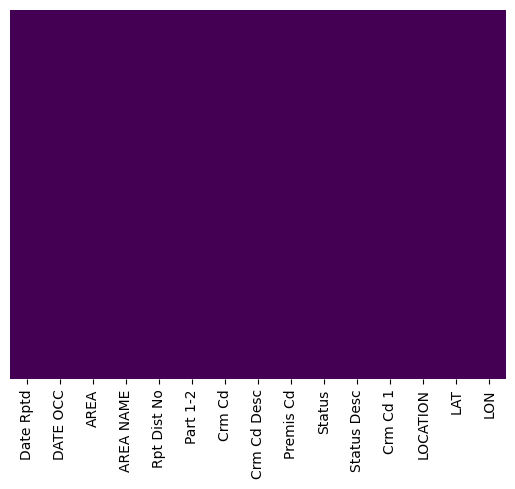

In [78]:
sns.heatmap(crime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

MAPING

In [103]:
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd

# Cargar el archivo GeoJSON con los vecindarios
neighbourhoods = gpd.read_file('neighbourhoods.geojson')

# Suponiendo que 'crime' es tu DataFrame de crímenes con columnas 'LAT' y 'LON'
# Crear un GeoDataFrame a partir del DataFrame de crímenes
crime_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.latitude, df.longitude))

# Crear un mapa centrado en Los Ángeles
m = folium.Map(location=[34.0522, -118.2437], zoom_start=11)

# Añadir los vecindarios al mapa usando GeoJson
folium.GeoJson(neighbourhoods,
               name='Neighbourhoods',
               tooltip=folium.GeoJsonTooltip(fields=['neighbourhood'], labels=True, sticky=False)
              ).add_to(m)


# Añadir control de capas (layers control) para los vecindarios y los marcadores de crímenes
folium.LayerControl().add_to(m)



# Mostrar el mapa en un Jupyter Notebook (opcional)
m


In [104]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, FastMarkerCluster
from folium.plugins import HeatMap
import geopandas as gpd
from branca.colormap import LinearColormap

# Crear un mapa centrado en Los Ángeles
m = folium.Map(location=[34.0522, -118.2437], zoom_start=11)

# Añadir los vecindarios al mapa usando GeoJson
folium.GeoJson(neighbourhoods,
               name='Neighbourhoods',
               style_function=lambda x: {'fillColor': 'lightblue', 'color': 'blue', 'weight': 1, 'fillOpacity': 0.3},
               tooltip=folium.GeoJsonTooltip(fields=['neighbourhood'], labels=True, sticky=False)
              ).add_to(m)

# Añadir los marcadores de las casas de Airbnb al mapa usando FastMarkerCluster
FastMarkerCluster(data=list(zip(df['latitude'], df['longitude']))).add_to(m)

# Añadir control de capas (layers control) para los vecindarios y las casas de Airbnb
folium.LayerControl().add_to(m)


# Mostrar el mapa en un Jupyter Notebook (si estás usando Jupyter)
m


In [110]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, FastMarkerCluster
from folium.plugins import HeatMap
import geopandas as gpd
from branca.colormap import LinearColormap



house_counts = df['neighbourhood'].value_counts().to_dict()

# Agregar una columna 'house_count' al GeoDataFrame de vecindarios
neighbourhoods['house_count'] = neighbourhoods['neighbourhood'].map(house_counts).fillna(0)

# Crear un mapa centrado en Los Ángeles
m = folium.Map(location=[34.0522, -118.2437], zoom_start=11)

# Crear un colormap para el número de casas
colormap = LinearColormap(colors=['green', 'yellow', 'red'], vmin=min(house_counts.values()), vmax=max(house_counts.values()))

# Añadir los vecindarios al mapa usando GeoJson y pintarlos según el número de casas
folium.GeoJson(
    neighbourhoods,
    name='Neighbourhoods',
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['house_count']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    },
    tooltip=folium.GeoJsonTooltip(fields=['neighbourhood', 'house_count'], labels=True, sticky=False)
).add_to(m)

# Añadir control de capas (layers control) para los vecindarios y las casas de Airbnb
folium.LayerControl().add_to(m)

m.save('airbnb_neighbourhoods_house_count_map.html')
# Mostrar el mapa en un Jupyter Notebook (si estás usando Jupyter)
m
